In [68]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [70]:
def imshow(img):
    img = img / 2 + 0.5     # 非标准化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()


In [71]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(32*32*3,32)
        self.fc2 = nn.Linear(32,10)
        
        
    def forward(self,x):
        x = x.view(-1,32*32*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
    
        return x
net= Net()

In [72]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [73]:
for epoch in range(10):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels = data
        inputs,labels = Variable(inputs),Variable(labels)
        #print(inputs.data.size())
        optimizer.zero_grad()
        
        outputs = net(inputs)
        #print(outputs.data.size())
        loss = criterion(outputs,labels)
        
        loss.backward()
        
        optimizer.step()
        
        
        running_loss +=loss.data[0]
        if i % 2000 ==1999:
            print('[%d, %5d] loss: %.3f' %
                 (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.822
[1,  4000] loss: 1.670
[2,  2000] loss: 1.567
[2,  4000] loss: 1.551
[3,  2000] loss: 1.501
[3,  4000] loss: 1.474
[4,  2000] loss: 1.437
[4,  4000] loss: 1.441
[5,  2000] loss: 1.417
[5,  4000] loss: 1.410
[6,  2000] loss: 1.374
[6,  4000] loss: 1.402
[7,  2000] loss: 1.355
[7,  4000] loss: 1.380
[8,  2000] loss: 1.339
[8,  4000] loss: 1.360
[9,  2000] loss: 1.328
[9,  4000] loss: 1.340
[10,  2000] loss: 1.315
[10,  4000] loss: 1.328
Finished Training


GroundTruth:   cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:   cat truck plane  bird  deer  frog   dog  frog   dog   car


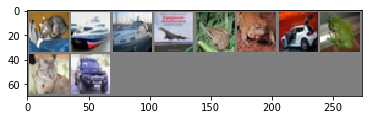

In [74]:
dataiter = iter(testloader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth:',' '.join('%5s'% classes[labels[j]] for j in range(10)))

outputs = net(Variable(images))

_,predicted = torch.max(outputs.data,1)
print('Predicted:',' '.join('%5s'% classes[predicted[j]] for j in range(10)))

In [75]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %
